## Content Based recommendation system

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("D:/Courses/big data/project/Anime/anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Exploring the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


In [4]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

### For Cotent based recommender system we will be using { Name, Genre, Type} column

In [5]:
# preprocessing
# filling NaN "Type" with unknown
df.loc[(df['type'].isnull()), 'type'] = 'Unknown'
# filling NaN "Genre" with unknown
df.loc[(df['genre'].isnull()), 'genre'] = 'Unknown'

In [6]:
df.isnull().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64

In [298]:
# Removing punctuation
#df['name'] = df['name'].str.replace('[^\w\s]','')
#df['name'].head()

In [7]:
# Dropping unwanted columns
df.drop(['rating', 'members', 'episodes'], axis=1, inplace=True)
df.head()

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [8]:
# Converting to lower case
df['genre'] = df['genre'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [157]:
# tokenization of keywords
#from textblob import TextBlob
#df['genre'] = df['genre'].apply(lambda x: TextBlob(x).words)
#df['type'] = df['type'].apply(lambda x: TextBlob(x).words)
#df['episodes'] = df['episodes'].apply(lambda x: TextBlob(x).words)
#df.head()

In [9]:
df['bag_of_words'] = ""
df.loc[:,'bag_of_words'] = df.loc[:, 'genre'] +', '+ df.loc[:, 'type']

In [10]:
# Data after preprocessing
df.head()

,anime_id,name,genre,type,bag_of_words
0,32281,Kimi no Na wa.,"drama, romance, school, supernatural",Movie,"drama, romance, school, supernatural, Movie"
1,5114,Fullmetal Alchemist: Brotherhood,"action, adventure, drama, fantasy, magic, mili...",TV,"action, adventure, drama, fantasy, magic, mili..."
2,28977,Gintama°,"action, comedy, historical, parody, samurai, s...",TV,"action, comedy, historical, parody, samurai, s..."
3,9253,Steins;Gate,"sci-fi, thriller",TV,"sci-fi, thriller, TV"
4,9969,Gintama&#039;,"action, comedy, historical, parody, samurai, s...",TV,"action, comedy, historical, parody, samurai, s..."


### Using sklearn TFIDF implementation

In [11]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df["bag_of_words"])

In [12]:
bag = vectorizer.get_feature_names()

In [17]:
# Using Cosine to obtain similaritier between two animes
cosine_sim = cosine_similarity(tfidf, tfidf)

In [18]:
cosine_sim.shape

(12294, 12294)

In [19]:
# recommender function
def recommendation(name, cosine_sim):
    recommended = np.array([])
    index_ = df.loc[(df['name'] == name)].index
    score = cosine_sim[index_]
    ind = np.argpartition(score[0], -10)[-11:]
    ind = ind[np.argsort(score[0][ind])]
    print(score[0][ind])
    #for i in ind:
     #   recommended = np.append(recommended, df.loc[(df.index == i)]['name'])        
    return ind

In [20]:
# Predicting movies similar to "Fairy Tail"
indices = recommendation('Fairy Tail', cosine_sim)
print(indices)
df[['anime_id','name', 'genre', 'type']].loc[indices]

[0.9394034  0.9394034  0.9394034  0.9394034  0.96155633 0.96155633
 0.96155633 0.96155633 0.96155633 1.         1.        ]
[ 1854   959  3592  2524 10953   290   101   268   795   255   288]


,anime_id,name,genre,type
1854,332,Dokidoki Densetsu: Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
959,331,Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
3592,1018,Majutsushi Orphen: Revenge,"adventure, comedy, fantasy, magic, shounen",TV
2524,1164,Mahou Senshi Louie,"adventure, comedy, fantasy, magic, shounen",TV
10953,28833,Chain Chronicle: Haecceitas no Hikari,"action, adventure, fantasy, magic, shounen",TV
290,31741,Magi: Sinbad no Bouken (TV),"action, adventure, fantasy, magic, shounen",TV
101,18115,Magi: The Kingdom of Magic,"action, adventure, fantasy, magic, shounen",TV
268,14513,Magi: The Labyrinth of Magic,"action, adventure, fantasy, magic, shounen",TV
795,8086,Densetsu no Yuusha no Densetsu,"action, adventure, fantasy, magic, shounen",TV
255,22043,Fairy Tail (2014),"action, adventure, comedy, fantasy, magic, sho...",TV


## TF - IDF implementation without library

In [21]:
# Calculating TF
tf = df['bag_of_words'].apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).reset_index()
tf.columns = ['words','tf']

# removing duplicate words
for i,word1 in enumerate(tf['words']):
    tf.loc[i, 'words']= word1.strip()
tf2 = {}
for i,word1 in enumerate(tf['words']):
    if word1 not in tf2.keys():
        tf2[word1] = tf.loc[i, 'tf']
    else:
        tf2[word1] += tf.loc[i, 'tf']
tf = pd.DataFrame.from_dict(tf2, orient='index').reset_index()
tf.columns = ['words','tf']
tf.head()

,words,tf
0,psychological,229.0
1,mecha,944.0
2,music,860.0
3,school,1220.0
4,historical,806.0


In [23]:
# Calculating IDF
N = df.shape[0]
idf = {}
for i,word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(N/(len(df[df['bag_of_words'].str.contains(word)])))
    idf[word] = np.log(N/(len(df[df['bag_of_words'].str.contains(word)])))


In [24]:
# Creating tfidf vectors
tff = pd.DataFrame(columns=tf['words'])
for i in range(N):
    dict_ = dict.fromkeys(tf['words'], 0)
    for word in df['bag_of_words'][i].split(", "):
        dict_[word] = (1/len(df['bag_of_words'][i].split(", "))) * idf[word]
    tff = tff.append(dict_, ignore_index=True)
tff.head()

words,psychological,mecha,music,school,historical,shounen ai,Unknown,military,shoujo ai,dementia,...,sports,martial arts,fantasy,horror,supernatural,parody,mystery,shoujo,action,OVA
0,0.0,0.0,0.0,0.462052,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.494556,0.0000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.420303,0.0,0.0,...,0.0,0.0,0.209037,0.0,0.000000,0.0000,0.0,0.0,0.182944,0.0
2,0.0,0.0,0.0,0.000000,0.340598,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.4257,0.0,0.0,0.182944,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.340598,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.4257,0.0,0.0,0.182944,0.0


In [25]:
cosine_sim_ = cosine_similarity(tff, tff)

### Comparing both with and without library tfidf implementation and recommending on the basis of contents

In [26]:
# Predicting movies similar to "Fairy Tail"
indices = recommendation('Fairy Tail', cosine_sim_)
print(indices)
df[['anime_id','name', 'genre', 'type']].loc[indices]

[0.94857288 0.94857288 0.94857288 0.94857288 0.97758854 0.97758854
 0.97758854 0.97758854 0.97758854 1.         1.        ]
[ 2524  1854  3592   959   101   268   795 10953   290   288   255]


,anime_id,name,genre,type
2524,1164,Mahou Senshi Louie,"adventure, comedy, fantasy, magic, shounen",TV
1854,332,Dokidoki Densetsu: Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
3592,1018,Majutsushi Orphen: Revenge,"adventure, comedy, fantasy, magic, shounen",TV
959,331,Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
101,18115,Magi: The Kingdom of Magic,"action, adventure, fantasy, magic, shounen",TV
268,14513,Magi: The Labyrinth of Magic,"action, adventure, fantasy, magic, shounen",TV
795,8086,Densetsu no Yuusha no Densetsu,"action, adventure, fantasy, magic, shounen",TV
10953,28833,Chain Chronicle: Haecceitas no Hikari,"action, adventure, fantasy, magic, shounen",TV
290,31741,Magi: Sinbad no Bouken (TV),"action, adventure, fantasy, magic, shounen",TV
288,6702,Fairy Tail,"action, adventure, comedy, fantasy, magic, sho...",TV


### Creating user profile and recommending movies 

In [27]:
user_ratings = pd.read_csv("D:/Courses/big data/project/Anime/rating.csv")
#user_ratings.head()

In [28]:
user_ratings.groupby(user_ratings["rating"]).count()

,user_id,anime_id
rating,,
-1,1476496,1476496
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019


In [29]:
# dropping missing ratings
user_ratings.drop(user_ratings[user_ratings['rating']==-1].index, axis=0, inplace=True)

In [30]:
user_ratings.groupby(user_ratings["rating"]).count()

,user_id,anime_id
rating,,
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019
9,1254096,1254096


Text(0, 0.5, 'Frequency')

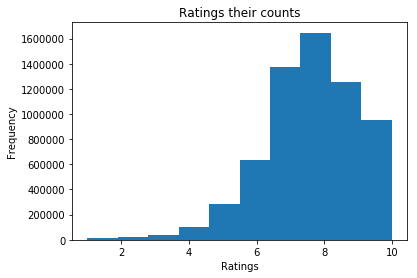

In [31]:
# create figure and axis
fig, ax = plt.subplots()
# plot histogram
ax.hist(user_ratings['rating'])
ax.set_title('Ratings their counts')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')

In [39]:
# selecting a random user
import random
# random.seed(123)
user = random.randint(1, max(user_ratings['user_id']))
data = user_ratings.loc[user_ratings['user_id']==user]
print("User selected for predictions UserId:", (user))

User selected for predictions UserId: 25178


In [40]:
data.shape

(149, 3)

In [43]:
# shifting the rating with center at zero
mean = data.mean()['rating']
data.loc[:, 'likeness'] = 0
data.loc[:, "likeness"] = data.loc[:, "rating"] - mean

In [45]:
data.head()

,user_id,anime_id,rating,likeness
2667600,25178,24,9,0.912752
2667601,25178,121,9,0.912752
2667602,25178,205,9,0.912752
2667603,25178,430,9,0.912752
2667604,25178,512,8,-0.087248


In [46]:
# creating user table for all the movies rated by him/her
user_prof = pd.DataFrame(columns=bag)
for id in data['anime_id']:
    dict_ = dict.fromkeys(bag, 0)
    for word in df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '):
        if word in bag:
            #dict_[word] = tf.loc[(tf.words == word)]['tfidf'][tf.loc[(tf.words == word), 'tfidf'].index[0]]
            dict_[word] = (1/len(df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '))) * idf[word]
    #print(dict_)    
    user_prof = user_prof.append(dict_, ignore_index=True)
user_prof.head()

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,special,sports,super,supernatural,thriller,tv,unknown,vampire,yaoi,yuri
0,0.000000,0.000000,0.0,0.0,0.0,0.194664,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.162616,0.183950,0.0,0.0,0.0,0.108147,0.0,0.0,0.200888,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.209078,0.236507,0.0,0.0,0.0,0.139046,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.139046,0.0,0.0,0.258285,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.236507,0.0,0.0,0.0,0.139046,0.0,0.0,0.258285,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Creating user prfile by doing weighted sum of the attributes he/she has rated
user_profile = []
for col in user_prof.columns:
    user_profile.append(user_prof[col] @ data['likeness'].values)

In [48]:
print(user_profile)

[0.8922000429156252, -0.6187227152562007, 0.0, 0.0, 0.0, 1.6850530629614628, 0.0, 1.2635189435237568, -0.41039120614879776, -0.6468176079487125, 1.670991857210206, 0.0, -0.7165431240223401, -2.1147572719116488, 0.0, 2.9961508722148817, -0.5270870295620954, 0.0, 0.0, 0.0, -0.32641957186129567, 0.0, -0.0746479325887675, 1.5833801479620768, 0.0, -1.8664169366465675, -3.077641352807742, 0.0, 0.0, 0.0, 8.64936819242238, -2.8415134251732677, 0.0, -0.06924994151385855, -0.07409362277243689, -0.15837447851955355, 1.2388208839664907, 0.0, -1.7823291950920321, -4.491254093662092, -0.6251551719511579, 0.0, 0.0, 0.0, -0.3655171061922693, 0.0, 1.4643255950339507, 1.7879779813544168, 0.0, 0.0, -4.746869298640032, 0.0, 0.0]


In [49]:
# Reshaping the array
import numpy as np
user = np.asarray(user_profile)
user = user.reshape(-1, 53)
user.shape

(1, 53)

In [50]:
cosine_sim_ = cosine_similarity(user, tfidf)
cosine_sim_.shape

(1, 12294)

In [51]:
sorted(cosine_sim_[0], reverse = True)

[0.6139486106508137,
 0.6139486106508137,
 0.6095780869131926,
 0.6095780869131926,
 0.6095780869131926,
 0.603863993759856,
 0.5976946293765993,
 0.5976946293765993,
 0.5913138827210022,
 0.5913138827210022,
 0.5913138827210022,
 0.5913138827210022,
 0.5913138827210022,
 0.5913138827210022,
 0.5913138827210022,
 0.5913138827210022,
 0.5913138827210022,
 0.5913138827210022,
 0.5913138827210022,
 0.5913138827210022,
 0.5852278873455234,
 0.5852278873455234,
 0.5852278873455234,
 0.5850546984958345,
 0.5850546984958345,
 0.5850546984958345,
 0.5850546984958345,
 0.5850546984958345,
 0.5850546984958345,
 0.5850546984958345,
 0.5850546984958345,
 0.5798479913349837,
 0.5798479913349837,
 0.5788854676600899,
 0.5788854676600899,
 0.5683594641823493,
 0.5683594641823493,
 0.5683594641823493,
 0.5683594641823493,
 0.5683594641823493,
 0.5683594641823493,
 0.5683594641823493,
 0.5645665699161161,
 0.5645665699161161,
 0.5645665699161161,
 0.5598924180497502,
 0.5596403070373424,
 0.55263158819

In [52]:
# getting recommended movies
ind = np.argpartition(cosine_sim_[0], -10)[-10:]
ind = ind[np.argsort(cosine_sim_[0][ind])]
print(cosine_sim_[0][ind])

[0.59131388 0.59131388 0.59769463 0.59769463 0.60386399 0.60957809
 0.60957809 0.60957809 0.61394861 0.61394861]


In [53]:
df[['anime_id', 'name', 'genre', 'type']].loc[ind]

,anime_id,name,genre,type
9803,20075,Obocchama-kun,"comedy, parody",TV
9363,20603,Kyoufu no Kyou-chan,"comedy, parody",TV
1665,7337,"Hetalia Axis Powers Movie: Paint it, White","comedy, historical, parody",Movie
8393,13507,Cofun Gal no Coffy: Okehazama no Tatakai,"comedy, historical, parody",Movie
9697,32572,Neko Neko Nihonshi,"historical, parody",TV
1381,9865,Hetalia Axis Powers Fan Disc,"comedy, historical, parody",OVA
1119,21075,Hetalia: The Beautiful World Extra Disc,"comedy, historical, parody",OVA
1035,31997,Hetalia: The World Twinkle Extra Disc,"comedy, historical, parody",OVA
9721,12181,Nihon Omoshiro Mukashibanashi,"comedy, historical, parody",TV
8873,13207,Himitsukessha Taka no Tsume Gaiden: Mukashi no...,"comedy, historical, parody",TV


In [54]:
#if '496' in data['anime_id'].values:
#    print('..')
count = 0
for val in df[['anime_id']].loc[ind]['anime_id'].values:
    if val in data.loc[data['likeness'] > 0]['anime_id'].values:
        count += 1
print(count)        

1


In [395]:
predicted_anime = df[['anime_id']].loc[ind]['anime_id'].values
actual_anime = data.loc[data['likeness'] > 0]['anime_id'].values

In [396]:
from scipy.spatial import distance
distance.jaccard(actual_anime, predicted_anime)

ValueError: operands could not be broadcast together with shapes (12,) (24,) 

In [397]:
predicted_anime

array([27899, 17729,  1629, 32281, 32071,   547,   713,   104,   546,
         395,   384,  1039,  1192, 16201,  6985,  2105,  1607,   634,
         376, 11837,  4484, 15045,   226,   514], dtype=int64)

In [398]:
actual_anime

array([1.000e+00, 5.000e+00, 6.700e+01, 1.500e+02, 1.890e+02, 2.260e+02,
       3.550e+02, 3.560e+02, 3.760e+02, 4.670e+02, 1.519e+03, 2.787e+03])

In [400]:
data.loc[data['likeness'] > 0]['anime_id']

5687234       1.0
5687235       5.0
5687244      67.0
5687246     150.0
5687247     189.0
5687249     226.0
5687254     355.0
5687255     356.0
5687256     376.0
5687257     467.0
5687264    1519.0
5687269    2787.0
Name: anime_id, dtype: float64